In [1]:
from tensorflow.keras import datasets, layers, models
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))[:50]
test_images = test_images.reshape((10000, 28, 28, 1))[:50]
train_labels = train_labels[:50]
test_labels = test_labels[:50]

In [2]:
train_images = resize(train_images, (50, 10, 10, 1))
test_images = resize(test_images, (50, 10, 10, 1))
np.shape(train_images)

(50, 10, 10, 1)

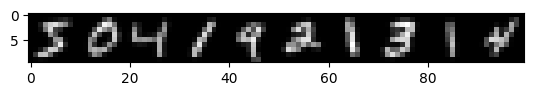

In [3]:
plt.imshow(np.hstack(train_images[:10]), cmap='gray')

In [4]:
pd.DataFrame(np.vstack(train_images[0]).reshape(10, 10))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000e+00,0.000000e+00,3.779813e-09,5.703982e-07,0.000004,1.042152e-05,0.000015,8.009369e-06,1.619335e-08
1,0.000000,3.493966e-07,7.807178e-04,7.999273e-03,2.619184e-02,0.059819,1.155171e-01,0.155306,7.679844e-02,1.519801e-04
2,0.000000,9.857660e-05,1.036307e-01,5.545328e-01,7.500384e-01,0.815209,6.413300e-01,0.491694,1.539254e-01,2.481732e-04
3,0.000000,2.617595e-05,5.656854e-02,4.300613e-01,8.046835e-01,0.233121,1.624373e-01,0.008346,1.218553e-03,5.837837e-07
4,0.000000,9.748591e-09,1.279662e-04,2.502775e-02,5.374982e-01,0.290856,3.380014e-02,0.000305,1.190274e-08,0.000000e+00
5,0.000000,0.000000e+00,6.266862e-09,2.610279e-04,6.696573e-02,0.564458,5.666593e-01,0.047100,1.411354e-05,0.000000e+00
6,0.000000,4.497760e-08,3.063738e-05,3.220381e-03,7.633813e-02,0.401042,8.656932e-01,0.157746,1.073702e-04,0.000000e+00
7,0.000008,5.200728e-03,7.889449e-02,3.434775e-01,7.748787e-01,0.739755,3.174749e-01,0.021589,2.289392e-06,0.000000e+00
8,0.000387,2.102920e-01,6.982965e-01,7.215174e-01,3.777502e-01,0.048582,1.853358e-03,0.000010,1.813034e-10,0.000000e+00
9,0.000029,1.430609e-02,3.384249e-02,1.997844e-02,1.852532e-03,0.000012,1.298005e-08,0.000000,0.000000e+00,0.000000e+00


In [5]:
train_images = (train_images*10).astype('int32')
test_images = (test_images*10).astype('int32')
pd.DataFrame(np.vstack(train_images[0]).reshape(10, 10))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,1,5,7,8,6,4,1,0
3,0,0,0,4,8,2,1,0,0,0
4,0,0,0,0,5,2,0,0,0,0
5,0,0,0,0,0,5,5,0,0,0
6,0,0,0,0,0,4,8,1,0,0
7,0,0,0,3,7,7,3,0,0,0
8,0,2,6,7,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


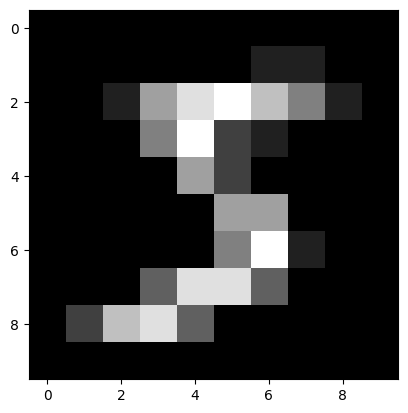

In [6]:
plt.imshow(train_images[0], cmap='gray')

In [7]:
import tensorflow as tf

tf.random.set_seed(123)
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                        

In [9]:
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 4, 4, 1) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 2, 2, 2) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [10]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [11]:
test_img = np.expand_dims(train_images[0], axis=0)
feature_maps = visual_model.predict(test_img)
feature_maps[0]

1/1 [==============================] - 0s 63ms/step


array([[[0.37106436],
        [1.6406934 ],
        [0.968734  ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.52298915],
        [3.691869  ],
        [4.1235223 ],
        [0.0817225 ],
        [0.        ],
        [1.0145953 ],
        [0.12665498],
        [0.96437114]],

       [[0.        ],
        [1.4299686 ],
        [1.9957452 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.68776584],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [2.1707428 ],
        [1.0380898 ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [1.113193  ],
        [1.9535649 ],
        [1.2199638 ],
        [0.        ],


In [12]:
len(visual_model.get_weights()), visual_model.get_weights()[0], visual_model.get_weights()[1]

(2,
 array([[[[-0.1853705 ]],
 
         [[-0.36166638]],
 
         [[-0.06006432]]],
 
 
        [[[ 0.389269  ]],
 
         [[-0.40733433]],
 
         [[ 0.52298915]]],
 
 
        [[[-0.555574  ]],
 
         [[-0.21462852]],
 
         [[ 0.37106436]]]], dtype=float32),
 array([0.], dtype=float32))

In [13]:
setW = np.array([[-0.4318703, 0.08380783, -0.23193197],
                 [0.05313462, 0.25442973, 0.33345792],
                 [-0.22227043, -0.02131751, 0.17737235]])

setB = np.array([-0.00019932])

setW = setW.reshape(3, 3, 1, 1)
weights = setW, setB
visual_model.set_weights(weights)

In [14]:
w = visual_model.get_weights()[0]
b = visual_model.get_weights()[1]
np.shape(w), np.vstack(w).reshape(3, 3), b

((3, 3, 1, 1),
 array([[-0.4318703 ,  0.08380783, -0.23193197],
        [ 0.05313462,  0.25442973,  0.33345792],
        [-0.22227043, -0.02131751,  0.17737235]], dtype=float32),
 array([-0.00019932], dtype=float32))

In [15]:
wVal = np.vstack(w).reshape(3, 3)
img = np.vstack(train_images[0]).reshape(10, 10)

print('>--- 0:3, 0:3 에서 스트라이드 1한 높이 0:3, 너비 1:4 인덱싱값')
print(img[0:3, 1:4])
print('\n>--- img[0:3, 1:4] * w')
print(img[0:3, 1:4]*wVal)
print('\n>--- img[0:3, 1:4] * w의 합 + b')
print(np.sum(img[0:3, 1:4]*wVal)+b)

>--- 0:3, 0:3 에서 스트라이드 1한 높이 0:3, 너비 1:4 인덱싱값
[[0 0 0]
 [0 0 0]
 [0 1 5]]

>--- img[0:3, 1:4] * w
[[-0.          0.         -0.        ]
 [ 0.          0.          0.        ]
 [-0.         -0.02131751  0.88686176]]

>--- img[0:3, 1:4] * w의 합 + b
[0.86534494]


In [16]:
np.sum(img[0:3, 1:4]*wVal)+b

array([0.86534494], dtype=float32)

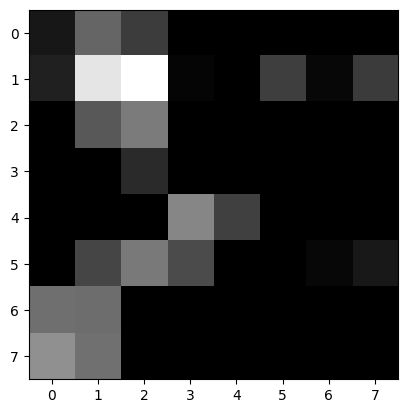

In [17]:
# len(feature_maps[0][0])
plt.imshow(feature_maps[0], cmap='gray')
# pd.DataFrame(np.vstack(feature_maps[0]).reshape(8, 8))

In [18]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[1])
visual_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [19]:
test_img = np.expand_dims(train_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

1/1 [==============================] - 0s 31ms/step


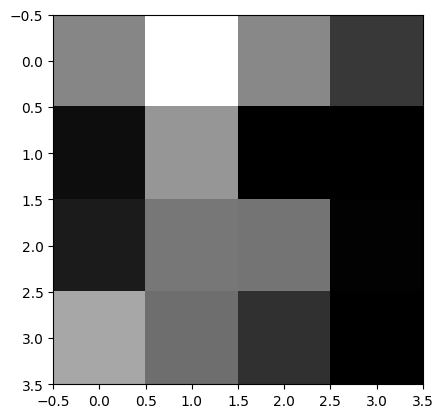

,0,1,2,3
0,2.631009,4.992998,2.671305,1.099452
1,0.257780,2.935690,0.000000,0.000000
2,0.531918,2.331755,2.281212,0.052935
3,3.271058,2.146567,0.966089,0.000000


In [20]:
plt.imshow(feature_maps[0], cmap='gray')
plt.show()
pd.DataFrame(np.vstack(feature_maps[0]).reshape(4, 4))

In [21]:
print(len(visual_model.get_weights()))
w = visual_model.get_weights()[0]
b = visual_model.get_weights()[1]
print(np.vstack(w).reshape(3, 3), b)
print(np.shape(w), np.shape(b))

2
[[-0.4318703   0.08380783 -0.23193197]
 [ 0.05313462  0.25442973  0.33345792]
 [-0.22227043 -0.02131751  0.17737235]] [-0.00019932]
(3, 3, 1, 1) (1,)


In [33]:
visual_model2 = tf.keras.models.Model(inputs = model.input, outputs = get_output[2])
visual_model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


<KerasTensor: shape=(None, 2, 2, 2) dtype=float32 (created by layer 'conv2d_1')>

In [23]:
print(len(visual_model2.get_weights()))
w = visual_model2.get_weights()[0]
b = visual_model2.get_weights()[1]
print(np.vstack(w).reshape(3, 3), b)
print(np.shape(w), np.shape(b))
w2 = visual_model2.get_weights()[2]
b2 = visual_model2.get_weights()[3]
print(w2, b2)

4
[[-0.4318703   0.08380783 -0.23193197]
 [ 0.05313462  0.25442973  0.33345792]
 [-0.22227043 -0.02131751  0.17737235]] [-0.00019932]
(3, 3, 1, 1) (1,)
[[[[ 0.08540502  0.13173309]]

  [[-0.22844784 -0.11707193]]

  [[ 0.37699243 -0.20870355]]]


 [[[ 0.1137785   0.08377591]]

  [[-0.02740073 -0.40009767]]

  [[-0.15904322 -0.09192541]]]


 [[[-0.44548252  0.3627803 ]]

  [[ 0.18320754 -0.29578614]]

  [[ 0.24744168  0.46837536]]]] [0. 0.]


In [24]:
weights = [w, b, w2, b2]
visual_model2.set_weights(weights)

In [25]:
len(visual_model2.get_weights())

4

In [26]:
w2 = visual_model2.get_weights()[2]
w2, b2

(array([[[[ 0.08540502,  0.13173309]],
 
         [[-0.22844784, -0.11707193]],
 
         [[ 0.37699243, -0.20870355]]],
 
 
        [[[ 0.1137785 ,  0.08377591]],
 
         [[-0.02740073, -0.40009767]],
 
         [[-0.15904322, -0.09192541]]],
 
 
        [[[-0.44548252,  0.3627803 ]],
 
         [[ 0.18320754, -0.29578614]],
 
         [[ 0.24744168,  0.46837536]]]], dtype=float32),
 array([0., 0.], dtype=float32))

In [27]:
maxpoolResult = np.vstack(feature_maps[0]).reshape(4, 4)
maxpoolResult

array([[2.6310093 , 4.992998  , 2.6713054 , 1.0994523 ],
       [0.2577803 , 2.93569   , 0.        , 0.        ],
       [0.53191775, 2.331755  , 2.2812119 , 0.0529353 ],
       [3.2710578 , 2.146567  , 0.96608925, 0.        ]], dtype=float32)

In [28]:
visual_model2.get_weights()

[array([[[[-0.4318703 ]],
 
         [[ 0.08380783]],
 
         [[-0.23193197]]],
 
 
        [[[ 0.05313462]],
 
         [[ 0.25442973]],
 
         [[ 0.33345792]]],
 
 
        [[[-0.22227043]],
 
         [[-0.02131751]],
 
         [[ 0.17737235]]]], dtype=float32),
 array([-0.00019932], dtype=float32),
 array([[[[ 0.08540502,  0.13173309]],
 
         [[-0.22844784, -0.11707193]],
 
         [[ 0.37699243, -0.20870355]]],
 
 
        [[[ 0.1137785 ,  0.08377591]],
 
         [[-0.02740073, -0.40009767]],
 
         [[-0.15904322, -0.09192541]]],
 
 
        [[[-0.44548252,  0.3627803 ]],
 
         [[ 0.18320754, -0.29578614]],
 
         [[ 0.24744168,  0.46837536]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [29]:
f1 = w2[:,:,:,0]
f2 = w2[:,:,:,1]

print('maxpoolResult값')
print(maxpoolResult[:3,:3])
print('\n->피처1 값', '-'*100)
print(f1.reshape(3,3))
print('\n->피처2 값', '-'*100)
print(f2.reshape(3,3))

print('\n-<[0:3, 0:3]*피처1값+b[0]합', '-'*50)
np.sum(maxpoolResult[:3, :3]*f1.reshape(3,3))+b[0], np.sum(maxpoolResult[:3, :3]*f2.reshape(3,3))+b[0]

maxpoolResult값
[[2.6310093  4.992998   2.6713054 ]
 [0.2577803  2.93569    0.        ]
 [0.53191775 2.331755   2.2812119 ]]

->피처1 값 ----------------------------------------------------------------------------------------------------
[[ 0.08540502 -0.22844784  0.37699243]
 [ 0.1137785  -0.02740073 -0.15904322]
 [-0.44548252  0.18320754  0.24744168]]

->피처2 값 ----------------------------------------------------------------------------------------------------
[[ 0.13173309 -0.11707193 -0.20870355]
 [ 0.08377591 -0.40009767 -0.09192541]
 [ 0.3627803  -0.29578614  0.46837536]]

-<[0:3, 0:3]*피처1값+b[0]합 --------------------------------------------------


(0.79451615, -1.3768941)